<a href="https://colab.research.google.com/github/Muskuu1109/Projects-1/blob/main/Project_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install scikit-learn

In [14]:
import sklearn as skl # Changed 'sckitlearn' to 'scikit-learn'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('mealDatabase.csv')
df

,Unnamed: 0,Meal Name,Category,Area,Tags
0,0,Apple Frangipan Tart,Dessert,British,"Tart,Baking,Fruity"
1,1,Apple & Blackberry Crumble,Dessert,British,Pudding
2,2,Apam balik,Dessert,Malaysian,NaN
3,3,Ayam Percik,Chicken,Malaysian,NaN
4,4,Bakewell tart,Dessert,British,"Tart,Baking,Alcoholic"
...,...,...,...,...,...
726,726,Vegetable Shepherd's Pie,Beef,Irish,Alcoholic
727,727,White chocolate creme brulee,Dessert,French,"Desert,DinnerParty,Pudding"
728,728,Wontons,Pork,Chinese,MainMeal
729,729,Walnut Roll Gužvara,Dessert,Croatian,Nutty


In [16]:
# Fill missing tag values with "Unknown"
df['Tags'].fillna("Unknown", inplace=True)

# Convert categorical data to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Category_encoded'] = encoder.fit_transform(df['Category'])
df['Area_encoded'] = encoder.fit_transform(df['Area'])

In [17]:
X = df[['Category_encoded', 'Area_encoded']]
y = df['Meal Name']  # Target: Meal names

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Example: Predict meal recommendation
input_data = [[3, 7]]  # Example encoded inputs (Category, Area)
print("Recommended Meal:", model.predict(input_data))

Recommended Meal: ['Chocolate Souffle']


In [19]:
import pandas as pd

# Load dataset
df = pd.read_csv("mealDatabase.csv")

# Fill missing values in 'Tags' with "Unknown"
df['Tags'].fillna("Unknown", inplace=True)

# Check structure
print(df.head())

   Unnamed: 0                   Meal Name Category       Area  \
0           0        Apple Frangipan Tart  Dessert    British   
1           1  Apple & Blackberry Crumble  Dessert    British   
2           2                  Apam balik  Dessert  Malaysian   
3           3                 Ayam Percik  Chicken  Malaysian   
4           4               Bakewell tart  Dessert    British   

                    Tags  
0     Tart,Baking,Fruity  
1                Pudding  
2                Unknown  
3                Unknown  
4  Tart,Baking,Alcoholic  


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Category_encoded'] = encoder.fit_transform(df['Category'])
df['Area_encoded'] = encoder.fit_transform(df['Area'])
df['Tags_encoded'] = encoder.fit_transform(df['Tags'])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Features: Category, Area, Tags
X = df[['Category_encoded', 'Area_encoded', 'Tags_encoded']]
y = df['Meal Name']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Example prediction (Category: 3, Area: 7, Tags: 5)
input_data = [[3, 7, 5]]
print("Recommended Meal:", model.predict(input_data))

Recommended Meal: ['Breakfast Potatoes']


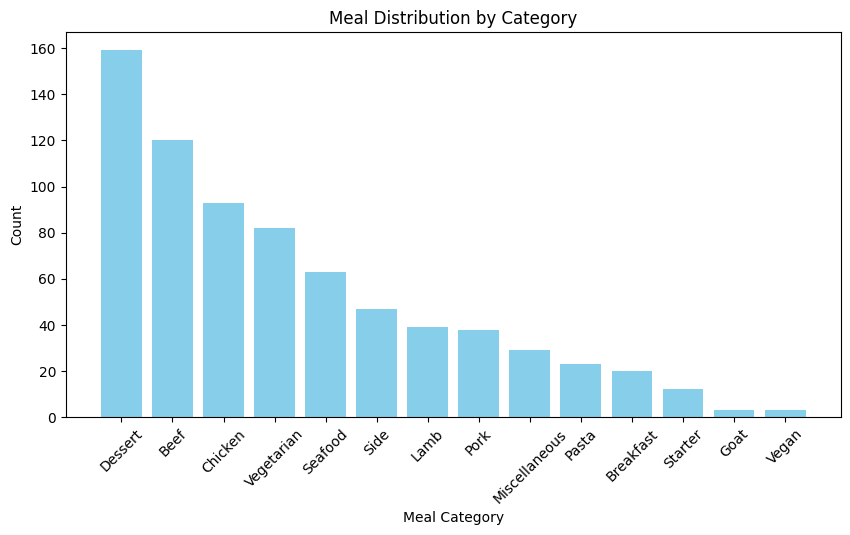

In [22]:
# Count meals per category
category_counts = df["Category"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Meal Category")
plt.ylabel("Count")
plt.title("Meal Distribution by Category")
plt.show()

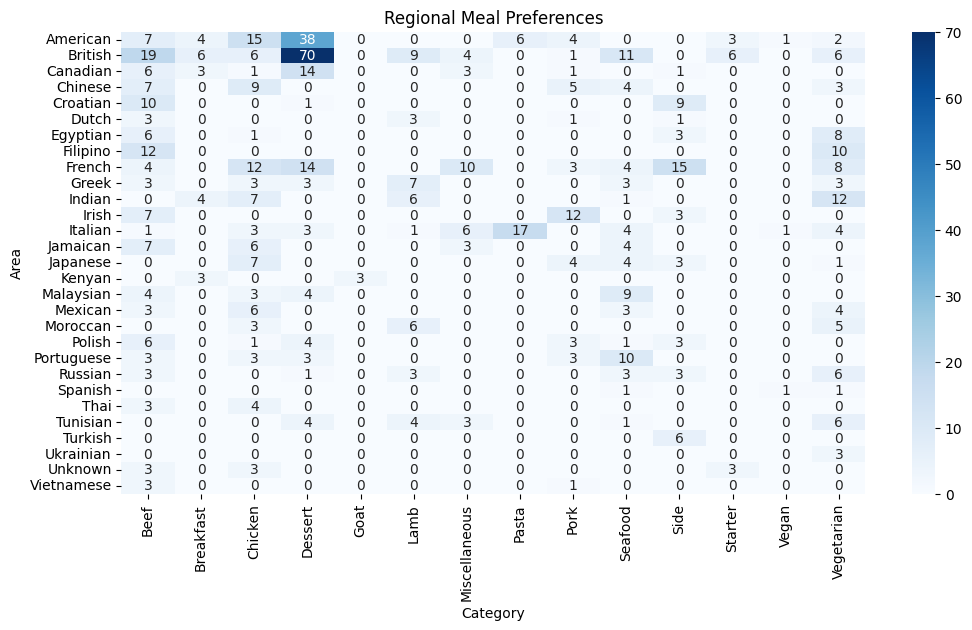

In [23]:
# Create a pivot table for areas & categories
pivot_data = df.pivot_table(index="Area", columns="Category", aggfunc="size", fill_value=0)

# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="Blues", annot=True, fmt="d")
plt.title("Regional Meal Preferences")
plt.xlabel("Category")
plt.ylabel("Area")
plt.show()

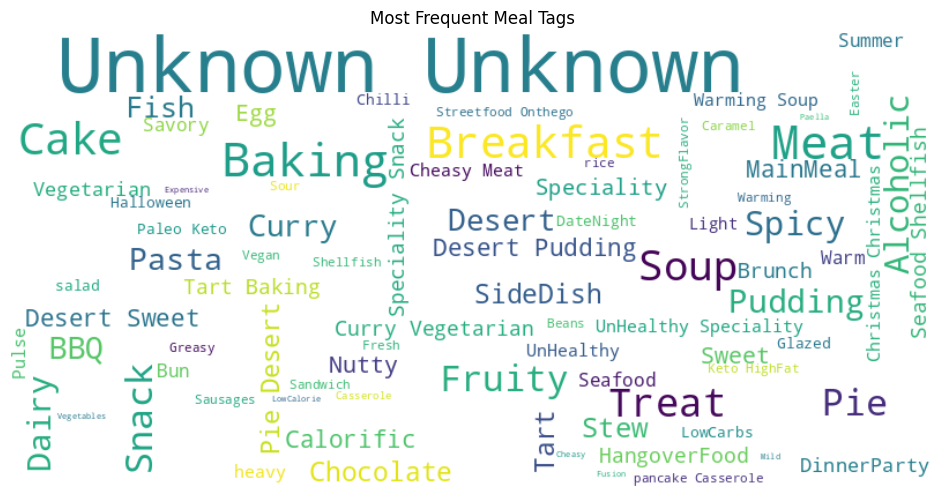

In [24]:
from wordcloud import WordCloud

# Combine all tags into a single text string
tag_text = " ".join(df["Tags"].dropna())

# Generate word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(tag_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Meal Tags")
plt.show()

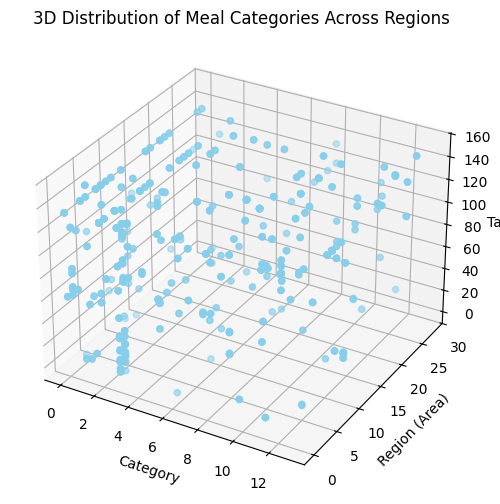

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("mealDatabase.csv")

# Encode categorical variables
encoder = LabelEncoder()
df["Category_encoded"] = encoder.fit_transform(df["Category"])
df["Area_encoded"] = encoder.fit_transform(df["Area"])
df["Tags_encoded"] = encoder.fit_transform(df["Tags"].fillna("Unknown"))

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Category_encoded"], df["Area_encoded"], df["Tags_encoded"], c="skyblue", marker="o")

# Set labels
ax.set_xlabel("Category")
ax.set_ylabel("Region (Area)")
ax.set_zlabel("Tags")

plt.title("3D Distribution of Meal Categories Across Regions")
plt.show()

In [27]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("mealDatabase.csv")

# Encode categorical variables
encoder = LabelEncoder()
df["Category_encoded"] = encoder.fit_transform(df["Category"])
df["Area_encoded"] = encoder.fit_transform(df["Area"])
df["Tags_encoded"] = encoder.fit_transform(df["Tags"].fillna("Unknown"))

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x="Category_encoded", y="Area_encoded", z="Tags_encoded",
                     color="Category", hover_data=["Meal Name"])

fig.update_layout(title="Interactive 3D Meal Data Visualization")
fig.show()

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("mealDatabase.csv")

# Fill missing values in 'Tags' with "Unknown"
df['Tags'].fillna("Unknown", inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
df['Category_encoded'] = encoder.fit_transform(df['Category'])
df['Area_encoded'] = encoder.fit_transform(df['Area'])
df['Tags_encoded'] = encoder.fit_transform(df['Tags'])

# Features (input)
X = df[['Category_encoded', 'Area_encoded', 'Tags_encoded']]

# Target (output)
y = df['Meal Name']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [34]:
import joblib
model = joblib.load('/content/model.pkl')